# **Kabir Chaturvedi**
## **SMM paper 1 file**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/smm data project excel.xlsx')
print(df.head())

                                                text       date  \
0  the biggest upset Argentina 🇦🇷 1 - 2 🇸🇦 Saudi ... 2022-11-22   
1  Greatest player of all time, what a goal and a... 2022-12-13   
2  Good game Argentia, you played great and it wa... 2022-12-13   
3  Im Dutch/Croatian so i didnt have the best wee... 2022-12-13   
4  Telemundo Broadcaster breaks down in tears, th... 2022-12-18   

  Type (Post or reply)   Subreddit  Upvotes  Comments Match Related  
0                 Post  r/worldcup    16000      2400       In game  
1                 Post  r/worldcup    11400      2500       In game  
2                reply  r/worldcup      164        18     post game  
3                reply  r/worldcup      130         2     post game  
4                 Post  r/worldcup    10400       738     post game  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   text                  80 non-null     object        
 1   date                  80 non-null     datetime64[ns]
 2   Type (Post or reply)  80 non-null     object        
 3   Subreddit             80 non-null     object        
 4   Upvotes               80 non-null     int64         
 5   Comments              80 non-null     int64         
 6   Match Related         80 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 4.5+ KB


In [4]:
import re

## **Function to clean the text data:**

In [5]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text


df['clean_text'] = df['text'].apply(clean_text)

In [6]:
from textblob import TextBlob


## Function to get sentiment:

In [7]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # Classifying the type of sentiment based on polarity:
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


df['sentiment'] = df['clean_text'].apply(get_sentiment)

## **Adjusted sentiment categories:**

In [8]:
sentiment_categories = {
    'euphoria': 0.65,  # High positive polarity
    'excitement': 0.35,  # Moderate positive polarity
    'happiness': 0.13,  # Mild positive polarity
    'neutral': 0,
    'disappointment': -0.13,  # Mild negative polarity
    'frustration': -0.35,  # Moderate negative polarity
    'anger': -0.65  # High negative polarity
}

- **Function to classify sentiment into one of the adjusted categories**:

In [9]:
def classify_adjusted_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    # Start with the most extreme negative sentiment
    classified_sentiment = 'anger'
    for sentiment, threshold in sentiment_categories.items():
        # As soon as the polarity exceeds a threshold, assign the corresponding sentiment
        if polarity >= threshold:
            classified_sentiment = sentiment
            break  # Exit the loop since we found our sentiment
    return classified_sentiment

# Apply the adjusted classification function
df['adjusted_sentiment'] = df['clean_text'].apply(classify_adjusted_sentiment)

In [10]:
df.to_excel('/content/smm_new_excel.xlsx', index=False)

In [11]:
new_df = pd.read_excel('/content/smm_new_excel.xlsx')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   text                  80 non-null     object        
 1   date                  80 non-null     datetime64[ns]
 2   Type (Post or reply)  80 non-null     object        
 3   Subreddit             80 non-null     object        
 4   Upvotes               80 non-null     int64         
 5   Comments              80 non-null     int64         
 6   Match Related         80 non-null     object        
 7   clean_text            80 non-null     object        
 8   sentiment             80 non-null     object        
 9   adjusted_sentiment    80 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 6.4+ KB


In [12]:
new_df.head(10)

,text,date,Type (Post or reply),Subreddit,Upvotes,Comments,Match Related,clean_text,sentiment,adjusted_sentiment
0,the biggest upset Argentina 🇦🇷 1 - 2 🇸🇦 Saudi ...,2022-11-22,Post,r/worldcup,16000,2400,In game,the biggest upset argentina saudi arabia,neutral,neutral
1,"Greatest player of all time, what a goal and a...",2022-12-13,Post,r/worldcup,11400,2500,In game,greatest player of all time what a goal and as...,positive,euphoria
2,"Good game Argentia, you played great and it wa...",2022-12-13,reply,r/worldcup,164,18,post game,good game argentia you played great and it was...,positive,excitement
3,Im Dutch/Croatian so i didnt have the best wee...,2022-12-13,reply,r/worldcup,130,2,post game,im dutchcroatian so i didnt have the best week...,positive,excitement
4,"Telemundo Broadcaster breaks down in tears, th...",2022-12-18,Post,r/worldcup,10400,738,post game,telemundo broadcaster breaks down in tears the...,positive,neutral
5,His mother was a cleaner. His Father a street ...,2022-12-06,post,r/worldcup,10400,1000,post game,his mother was a cleaner his father a street v...,neutral,neutral
6,Did the morrocans in Spain riot after this win?,2022-12-06,reply,r/worldcup,6,8,post game,did the morrocans in spain riot after this win,positive,euphoria
7,It's pens. He wasn't a nightmare. The nightmar...,2022-12-06,reply,r/worldcup,24,15,post game,its pens he wasnt a nightmare the nightmare wa...,negative,frustration
8,Cristiano Ronaldo leaves the pitch in tears af...,2022-12-10,Post,r/worldcup,7900,863,post game,cristiano ronaldo leaves the pitch in tears af...,neutral,neutral
9,Shameful behaviour.\n\nRan away and abondoned ...,2022-12-10,reply,r/worldcup,-2,24,post game,shameful behaviour\n\nran away and abondoned h...,negative,anger


- **Changing the date column in the dataframe to get rid of the seconds from the 'date' column:**

In [13]:
# Convert the 'date' column to datetime
new_df['date'] = pd.to_datetime(new_df['date'])

# Format the 'date' column to keep only the month, day, and year
new_df['formatted_date'] = new_df['date'].dt.strftime('%Y-%m-%d')

# Display the updated DataFrame
new_df[['date', 'formatted_date']].head()

,date,formatted_date
0,2022-11-22,2022-11-22
1,2022-12-13,2022-12-13
2,2022-12-13,2022-12-13
3,2022-12-13,2022-12-13
4,2022-12-18,2022-12-18


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   text                  80 non-null     object        
 1   date                  80 non-null     datetime64[ns]
 2   Type (Post or reply)  80 non-null     object        
 3   Subreddit             80 non-null     object        
 4   Upvotes               80 non-null     int64         
 5   Comments              80 non-null     int64         
 6   Match Related         80 non-null     object        
 7   clean_text            80 non-null     object        
 8   sentiment             80 non-null     object        
 9   adjusted_sentiment    80 non-null     object        
 10  formatted_date        80 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 7.0+ KB


# **Data Visualizations:**

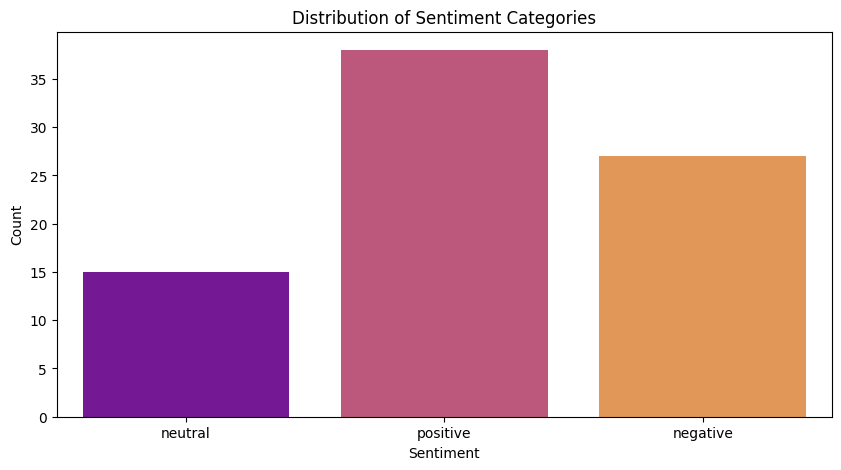

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))


sns.countplot(x='sentiment', hue='sentiment', data=new_df, palette='plasma', legend=False)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.legend([],[], frameon=False)

plt.show()


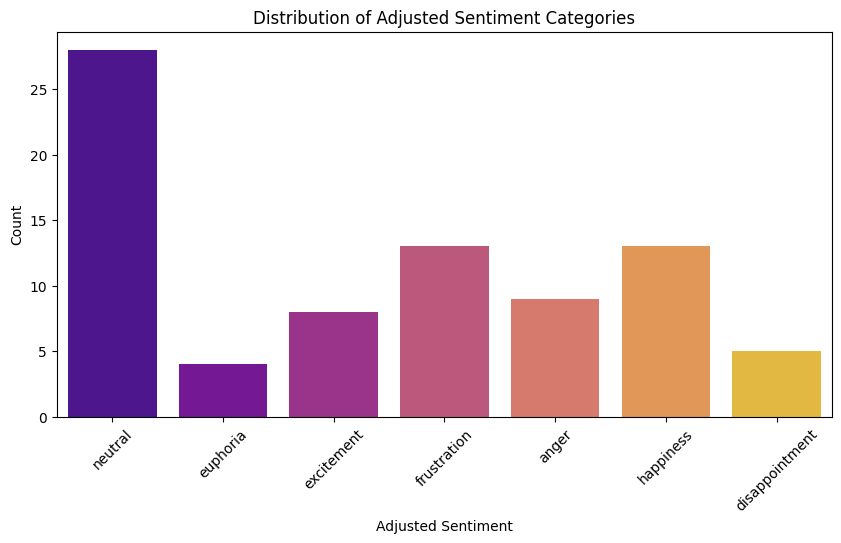

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))


sns.countplot(x='adjusted_sentiment', hue='adjusted_sentiment', data=new_df, palette='plasma', legend=False)
plt.title('Distribution of Adjusted Sentiment Categories')
plt.xlabel('Adjusted Sentiment')
plt.ylabel('Count')

# Rotating the labels on the x-axis to make them fit better:
plt.xticks(rotation=45)

plt.legend([],[], frameon=False)

plt.show()


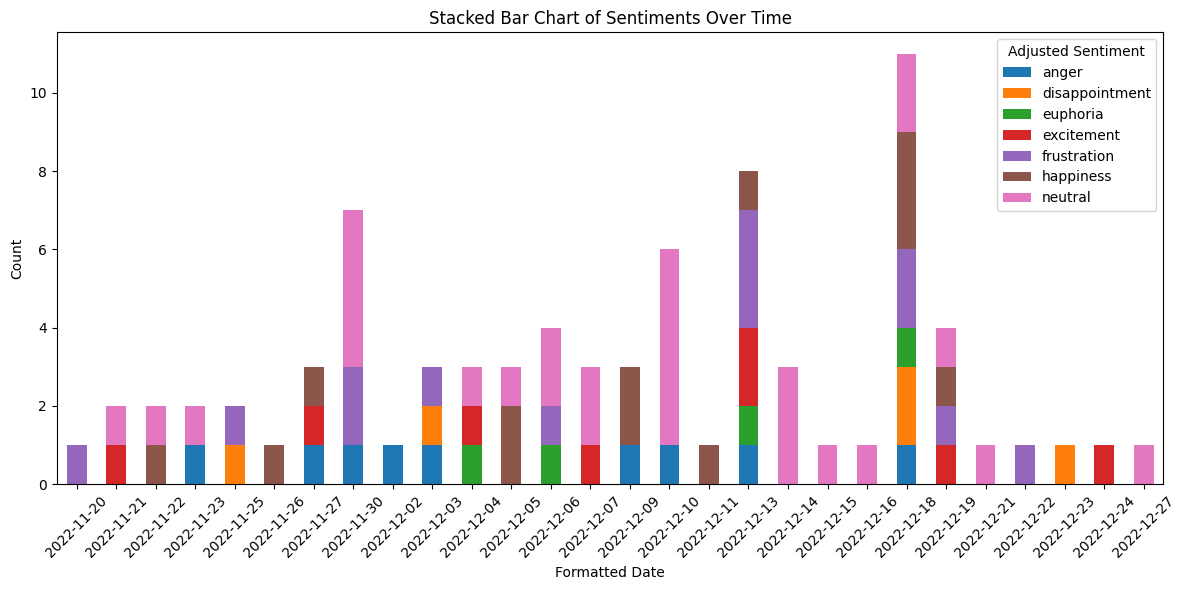

In [17]:
import matplotlib.pyplot as plt

# Custom color scheme:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']



sentiment_counts_new_df = new_df.groupby(['formatted_date', 'adjusted_sentiment']).size().unstack(fill_value=0)

# stacked bar chart:
sentiment_counts_new_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.title('Stacked Bar Chart of Sentiments Over Time')
plt.xlabel('Formatted Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Adjusted Sentiment')
plt.tight_layout()
plt.show()

# **For the "sentiment" column:**

In [18]:
import pandas as pd


sentiments = ["positive", "negative", "neutral"]
sentiment_counts = new_df['sentiment'].value_counts().reindex(sentiments, fill_value=0)
sentiment_percentages = (sentiment_counts / len(new_df)) * 100

# Creating a dataFrame from the counts and percentages:

sentiment_table = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Count': sentiment_counts.values,
    'Percentage': sentiment_percentages.values
})

# Sorting the dataFrame by percentage in descending order
sentiment_table.sort_values('Percentage', ascending=False, inplace=True)

sentiment_table

,Sentiment,Count,Percentage
0,positive,38,47.50
1,negative,27,33.75
2,neutral,15,18.75


In [19]:
import pandas as pd


sentiments = ["positive", "negative", "neutral"]
sentiment_counts = new_df['sentiment'].value_counts().reindex(sentiments, fill_value=0)

sentiment_table = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Count': sentiment_counts.values
})

sentiment_table.sort_values('Count', ascending=False, inplace=True)

sentiment_table

,Sentiment,Count
0,positive,38
1,negative,27
2,neutral,15


# **For the "adjusted_sentiment" column:**

In [20]:
import pandas as pd

sentiments = ["anger", "disappointment", "euphoria", "excitement", "frustration", "happiness", "neutral"]
adjusted_sentiment_counts = new_df['adjusted_sentiment'].value_counts().reindex(sentiments, fill_value=0)

adjusted_sentiment_table = pd.DataFrame({
    'Sentiment': adjusted_sentiment_counts.index,
    'Count': adjusted_sentiment_counts.values
})


adjusted_sentiment_table.sort_values('Count', ascending=False, inplace=True)

adjusted_sentiment_table = adjusted_sentiment_table.reset_index(drop=True)

adjusted_sentiment_table

,Sentiment,Count
0,neutral,28
1,frustration,13
2,happiness,13
3,anger,9
4,excitement,8
5,disappointment,5
6,euphoria,4


In [21]:
import pandas as pd


sentiments = ["anger", "disappointment", "euphoria", "excitement", "frustration", "happiness", "neutral"]


sentiment_counts = {}
sentiment_percentages = {}


for sentiment in sentiments:

  sentiment_counts[sentiment] = new_df['adjusted_sentiment'].value_counts().get(sentiment, 0)
  sentiment_percentages[sentiment] = (sentiment_counts[sentiment] / len(new_df)) * 100


sentiment_table = pd.DataFrame(list(sentiment_percentages.items()), columns=['Sentiment', 'Percentage'])

sentiment_table = sentiment_table.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

sentiment_table

,Sentiment,Percentage
0,neutral,35.00
1,frustration,16.25
2,happiness,16.25
3,anger,11.25
4,excitement,10.00
5,disappointment,6.25
6,euphoria,5.00
